## [미니프로젝트] 악성사이트 탐지 머신러닝 모델 개발

## <b>[2단계] 데이터 분석 및 전처리

## ▣ 데이터 소개
* 학습 데이터셋 : train_dataset.csv
<br>

## ▣ 학습 데이터셋의 변수 소개

* url_len : URL 길이
* url_num_hypens_dom : URL내 '-'(하이픈) 개수
* url_path_len : URL의 경로 길이
* url_domain_len : URL의 도메인 길이
* url_host_name : URL의 hostname 길이
* url_num_dots : URL내 '.'(닷) 개수
* url_num_underscores : URL내 '_'(언더바) 개수
* url_query_len : URL쿼리 길이
* url_num_query_para : URL쿼리의 파라미터 개수
* url_ip_present : URL내 IP표시 여부
* url_entropy : URL 복잡도
* url_chinese_present : URL내 중국어 표기 여부
* url_port : URL내 포트 표기 여부
* html_num_tags('iframe') : HTML내 'iframe' 태그 개수
* html_num_tags('script') : HTML내 'script' 태그 개수
* html_num_tags('embed') : HTML내 'embed' 태그 개수
* html_num_tags('object') : HTML내 'object' 태그 개수
* html_num_tags('div') : HTML내 'div' 태그 개수
* html_num_tags('head') : HTML내 'head' 태그 개수
* html_num_tags('body') : HTML내 'body' 태그 개수
* html_num_tags('form') : HTML내 'form' 태그 개수
* html_num_tags('a') : HTML내 'a' 태그 개수
* html_num_tags('applet') : HTML내 'applet' 태그 개수
* Result_v1 : 악성사이트 여부 컬럼 ( 'malicious'는 악성사이트, 'benign'은 정상사이트 )

<br>

---

### **[프로세스]**
0. 라이브러리 import 및 데이터 불러오기
1. 데이터 분석하기
2. 데이터 전처리하기


---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

* 데이터 프레임 관련 라이브러리

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
# 여기에 답안코드를 작성하세요.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **나.  학습데이터 불러오기**

In [3]:
# 여기에 답안코드를 작성하세요.

df = pd.read_csv('train.csv',delimiter=',')
df_col = df.columns

# <b>Step 1. 데이터 분석하기
---

단변량 분석은 데이터분석의 매우 기초적인 분석기법으로, 독립적인 개별 변수가 가지고있는 특성들을 이해하는 과정입니다.

## <b>Q1. 데이터 단변량 분석하기

<span style="color: green"> 개별 변수에 대해 아래 사항들을 분석해보세요. </span>

1. 변수가 내포하고 있는 의미
2. 변수가 수치형인지, 범주형인지
3. 결측치 존재 여부 및 조치 방안
4. 기초 통계량 확인
5. 데이터 분포 확인
6. 위 정보로부터 파악한 내용 정리
7. 추가 분석사항 도출

Feature별 단변량 분석

In [4]:
# 여기에 답안코드를 작성하세요.

import seaborn as sns

In [5]:
# 여기에 답안코드를 작성하세요.

df.head(11)

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,malicious
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,benign
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,benign
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,benign
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,benign
5,18.0,0.0,0.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,4.0,1.0,1.0,3.0,1.0,1.0,0.0,18.0,0.0,benign
6,49.0,0.0,30.0,19.0,19.0,4.0,0.0,0.0,0.0,0.0,...,8.0,0.0,0.0,19.0,1.0,1.0,1.0,4.0,0.0,malicious
7,25.0,0.0,0.0,25.0,25.0,2.0,0.0,0.0,0.0,0.0,...,22.0,0.0,0.0,333.0,1.0,1.0,1.0,155.0,0.0,benign
8,39.0,0.0,22.0,17.0,17.0,3.0,0.0,0.0,0.0,0.0,...,17.0,0.0,0.0,32.0,1.0,1.0,2.0,29.0,0.0,benign
9,40.0,0.0,1.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,3.0,0.0,0.0,18.0,1.0,1.0,0.0,2.0,0.0,malicious


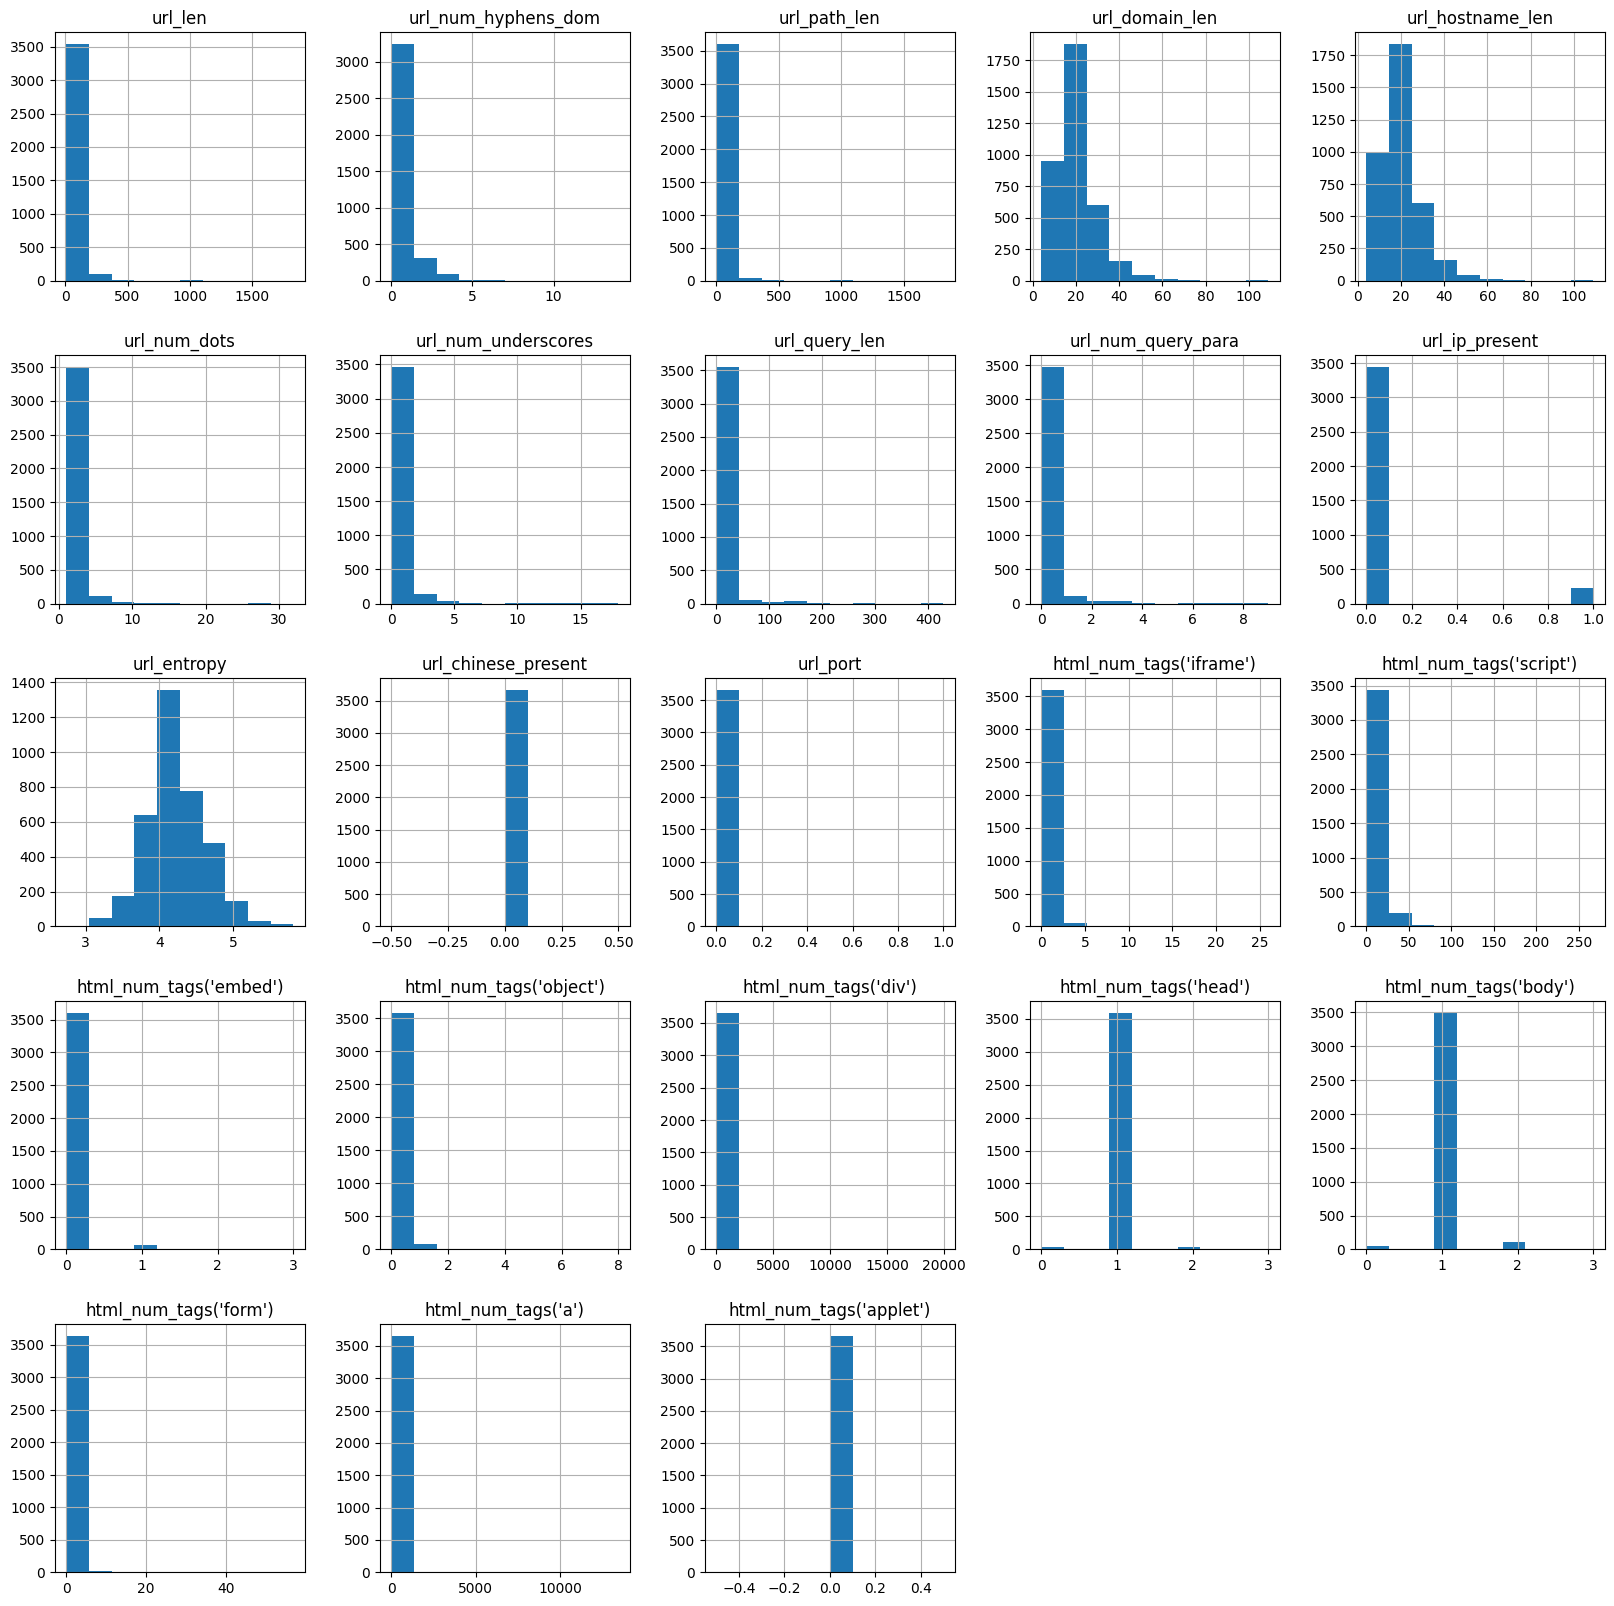

In [6]:
# 여기에 답안코드를 작성하세요.

df.hist(bins=10, grid=True, figsize=(20,20))
plt.show()

In [7]:
# 여기에 답안코드를 작성하세요.

df.describe(include='all')

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label
count,3664.000000,3664.000000,3663.000000,3663.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,...,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.000000,3664.0,3664
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,benign
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1858
mean,54.559225,0.412937,29.365820,20.383292,20.330513,2.516921,0.272653,4.707697,0.104258,0.060862,...,8.785480,0.018013,0.028930,70.843886,0.998090,1.016648,1.028930,66.182860,0.0,NaN
std,82.493265,0.847058,78.595248,9.597012,9.628093,1.534119,1.124592,25.318285,0.574310,0.239110,...,12.647356,0.144808,0.237682,365.593304,0.144974,0.225330,1.563903,342.651459,0.0,NaN
min,6.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN
25%,24.000000,0.000000,1.000000,14.000000,14.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,0.000000,0.000000,6.000000,1.000000,1.000000,0.000000,2.000000,0.0,NaN
50%,36.000000,0.000000,13.000000,17.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,...,4.000000,0.000000,0.000000,33.000000,1.000000,1.000000,1.000000,16.000000,0.0,NaN
75%,55.000000,1.000000,31.000000,24.000000,24.000000,3.000000,0.000000,0.000000,0.000000,0.000000,...,12.000000,0.000000,0.000000,62.000000,1.000000,1.000000,1.000000,52.000000,0.0,NaN


## <b>Q2. 중복 데이터 제거
### 우리가 접속하는 대부분의 웹사이트는 정상 사이트입니다.
### 또한, 특정 몇 개 사이트(ex. google, instagram, facebook 등)에 접속 빈도가 높습니다.
### 편중된 데이터는 모델 학습에 안 좋은 영향을 주기 때문에 중복 데이터 제거를 통해 해결합니다.
### 이 과정은 데이터 전처리 시 반드시 해야 하는 과정은 아니며, 프로젝트/데이터 성격에 맞게 결정하시면 됩니다.

### <span style="color:darkred">[문제1] df info()를 통해 데이터를 확인하고 중복된 데이터는 삭제해주세요. 삭제 후 info()를 통해 이전 데이터와 비교해 보세요.<span>

In [8]:
# 여기에 답안코드를 작성하세요.

# 데이터 프레임의 info를 확인합니다.(Hint : dataframe.info())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3664 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3664 non-null   float64
 1   url_num_hyphens_dom      3664 non-null   float64
 2   url_path_len             3663 non-null   float64
 3   url_domain_len           3663 non-null   float64
 4   url_hostname_len         3664 non-null   float64
 5   url_num_dots             3664 non-null   float64
 6   url_num_underscores      3664 non-null   float64
 7   url_query_len            3664 non-null   float64
 8   url_num_query_para       3664 non-null   float64
 9   url_ip_present           3664 non-null   float64
 10  url_entropy              3664 non-null   float64
 11  url_chinese_present      3664 non-null   float64
 12  url_port                 3664 non-null   float64
 13  html_num_tags('iframe')  3664 non-null   float64
 14  html_num_tags('script') 

In [9]:
# 여기에 답안코드를 작성하세요.
# 중복 데이터 제거를 제거합니다. (Hint: : dataframe.drop_duplicates())

df=df.drop_duplicates()


In [10]:
# 여기에 답안코드를 작성하세요.
# 데이터 프레임의 info를 확인합니다.(Hint : dataframe.info())

df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 3233 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3233 non-null   float64
 1   url_num_hyphens_dom      3233 non-null   float64
 2   url_path_len             3232 non-null   float64
 3   url_domain_len           3232 non-null   float64
 4   url_hostname_len         3233 non-null   float64
 5   url_num_dots             3233 non-null   float64
 6   url_num_underscores      3233 non-null   float64
 7   url_query_len            3233 non-null   float64
 8   url_num_query_para       3233 non-null   float64
 9   url_ip_present           3233 non-null   float64
 10  url_entropy              3233 non-null   float64
 11  url_chinese_present      3233 non-null   float64
 12  url_port                 3233 non-null   float64
 13  html_num_tags('iframe')  3233 non-null   float64
 14  html_num_tags('script')  3233

---

## <b>Q3. 텍스트와 범주형 특성 처리

### 기계가 데이터를 인식할 수 있도록 텍스트 데이터를 수치형 데이터로 변경합니다.
 - replace() 함수를 이용한 텍스트와 범주형 특성 처리

**<span style="color:green">[참고링크] 공식 Document**</span>

* replace(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html)
* unique(https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html)

### <span style="color:darkred">[문제2] replace() 함수를 활용 'benign'은 0로 'malicious'은 1로 변경해주세요.  df['label'] 삭제 후 전후 데이터를 비교해 보세요.<span>

In [11]:
# 여기에 답안코드를 작성하세요.

# 텍스트 데이터를 수치형 데이터로 변경 전 unique() 함수를 통해 유일한 값 확인
df['label'].unique()

array(['malicious', 'benign'], dtype=object)

In [12]:
# 여기에 답안코드를 작성하세요.

df.loc[:,['label_binary']] = df['label'].copy()

In [13]:
# 여기에 답안코드를 작성하세요.

# replace() 함수를 사용 텍스트 데이터를 수치형 데이터로 변경합니다.  (Hint : replace({'CA':'California','NY':'NewYork'}, inplace=True))
df['label_binary'].replace({'benign':0,'malicious':1}, inplace=True)

In [14]:
# 여기에 답안코드를 작성하세요.

# 텍스트 데이터를 수치형 데이터로 후 unique() 함수를 통해 유일한 값 확인
df['label_binary'].unique()

array([1, 0], dtype=int64)

In [15]:
# 여기에 답안코드를 작성하세요.

df.drop(['label'],axis=1,inplace=True)

---

## <b>Q4. 결측치 처리

### 데이터 수집 과정에서 발생한 오류 등으로 인해 결측치가 포함된 경우가 많습니다.
### 모델링 전에 결측치를 확인하고 이를 정제하는 과정은 필요합니다.

### <span style="color:darkred">[문제3] 결측치의 존재를 확인하고 결측치가 포함된 데이터를 처리해보세요.<span>

In [17]:
# 여기에 답안코드를 작성하세요.

# 결측치의 존재를 확인합니다. (Hint : info(),isnull().sum())

df.isnull().sum()

url_len                    0
url_num_hyphens_dom        0
url_path_len               1
url_domain_len             1
url_hostname_len           0
url_num_dots               0
url_num_underscores        0
url_query_len              0
url_num_query_para         0
url_ip_present             0
url_entropy                0
url_chinese_present        0
url_port                   0
html_num_tags('iframe')    0
html_num_tags('script')    0
html_num_tags('embed')     0
html_num_tags('object')    0
html_num_tags('div')       0
html_num_tags('head')      0
html_num_tags('body')      0
html_num_tags('form')      0
html_num_tags('a')         0
html_num_tags('applet')    0
label_binary               0
dtype: int64

In [18]:
# 여기에 답안코드를 작성하세요.
# 결측치를 적절히 처리해줍니다.
df = df.dropna(axis=0)

In [19]:
# 여기에 답안코드를 작성하세요.
# 결축치의 존재를 확인합니다. (Hint : info(),isnull().sum())
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3231 entries, 0 to 3663
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_len                  3231 non-null   float64
 1   url_num_hyphens_dom      3231 non-null   float64
 2   url_path_len             3231 non-null   float64
 3   url_domain_len           3231 non-null   float64
 4   url_hostname_len         3231 non-null   float64
 5   url_num_dots             3231 non-null   float64
 6   url_num_underscores      3231 non-null   float64
 7   url_query_len            3231 non-null   float64
 8   url_num_query_para       3231 non-null   float64
 9   url_ip_present           3231 non-null   float64
 10  url_entropy              3231 non-null   float64
 11  url_chinese_present      3231 non-null   float64
 12  url_port                 3231 non-null   float64
 13  html_num_tags('iframe')  3231 non-null   float64
 14  html_num_tags('script')  3231

---

## <b>Q5. 데이터 탐색을 통해 새로운 변수 추가 혹은 불필요한 변수 제거

### AI모델의 성능 향상을 위해 기존의 변수를 조합해 새로운 변수를 만들어 내기도 하고
### 데이터 분석을 통해 필요없는 변수는 삭제하는 과정이 필요 합니다.

### <span style="color:darkred">[문제4] 상관관계 함수 및 데이터 시각화 등을 활용하며 데이터셋을 분석하고 컬럼을 추가/삭제 해보세요.<span>

* <span style="color:darkred">[문제4-1] 상관관계 분석<span>

In [20]:
# 여기에 답안코드를 작성하세요.
df.corr()

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),label_binary
url_len,1.000000,-0.025183,0.944497,0.001670,0.002085,0.267134,0.307256,0.318540,0.267502,-0.067771,...,-0.026803,-0.012114,-0.021489,-0.013241,0.074980,0.043752,-0.037282,-0.019775,NaN,-0.006429
url_num_hyphens_dom,-0.025183,1.000000,-0.097643,0.589203,0.590278,-0.085324,-0.063695,0.001715,-0.002627,-0.124600,...,-0.110263,-0.052932,-0.048672,-0.013765,0.039036,-0.043295,0.038427,-0.036904,NaN,0.355480
url_path_len,0.944497,-0.097643,1.000000,-0.123280,-0.123081,0.196425,0.254179,0.011303,0.010422,-0.037249,...,0.006749,-0.003340,-0.015291,-0.008044,0.078578,-0.006032,-0.042510,-0.008870,NaN,-0.113835
url_domain_len,0.001670,0.589203,-0.123280,1.000000,0.998956,0.082025,-0.092685,0.014915,0.015721,-0.150800,...,-0.103895,-0.012265,-0.029448,-0.002495,0.002868,0.031097,0.033835,-0.035063,NaN,0.380448
url_hostname_len,0.002085,0.590278,-0.123081,0.998956,1.000000,0.078337,-0.094091,0.016032,0.016803,-0.169295,...,-0.101211,-0.011445,-0.030490,-0.001540,0.002779,0.031446,0.036627,-0.033953,NaN,0.384489
url_num_dots,0.267134,-0.085324,0.196425,0.082025,0.078337,1.000000,0.261850,0.227932,0.197153,0.184992,...,-0.086458,-0.030750,-0.017976,-0.027272,-0.024784,-0.000531,-0.066137,-0.027895,NaN,-0.047256
url_num_underscores,0.307256,-0.063695,0.254179,-0.092685,-0.094091,0.261850,1.000000,0.246116,0.245183,-0.052211,...,-0.069631,-0.029422,-0.021538,-0.017179,0.058713,0.031360,-0.079358,-0.007495,NaN,-0.133808
url_query_len,0.318540,0.001715,0.011303,0.014915,0.016032,0.227932,0.246116,1.000000,0.834315,-0.048321,...,-0.069375,-0.024240,-0.011191,-0.016998,-0.001409,0.150485,-0.001790,-0.023486,NaN,0.189689
url_num_query_para,0.267502,-0.002627,0.010422,0.015721,0.016803,0.197153,0.245183,0.834315,1.000000,-0.046998,...,-0.066136,-0.023577,-0.016486,-0.015185,-0.019294,0.109691,-0.005181,-0.022982,NaN,0.184497
url_ip_present,-0.067771,-0.124600,-0.037249,-0.150800,-0.169295,0.184992,-0.052211,-0.048321,-0.046998,1.000000,...,-0.086306,-0.032573,0.041407,-0.031192,0.012362,-0.018434,-0.077854,-0.035891,NaN,-0.076236


In [21]:
# 여기에 답안코드를 작성하세요.

df.corr()['label_binary'].sort_values(ascending=False)

label_binary               1.000000
url_hostname_len           0.384489
url_domain_len             0.380448
url_num_hyphens_dom        0.355480
url_query_len              0.189689
url_num_query_para         0.184497
url_entropy                0.162198
html_num_tags('form')      0.116354
html_num_tags('body')      0.110581
html_num_tags('head')      0.012990
url_len                   -0.006429
url_port                  -0.006642
html_num_tags('iframe')   -0.033966
url_num_dots              -0.047256
html_num_tags('div')      -0.061183
url_ip_present            -0.076236
html_num_tags('object')   -0.105710
html_num_tags('embed')    -0.111295
url_path_len              -0.113835
html_num_tags('a')        -0.113966
url_num_underscores       -0.133808
html_num_tags('script')   -0.202309
url_chinese_present             NaN
html_num_tags('applet')         NaN
Name: label_binary, dtype: float64

* <span style="color:darkred">[실습4-2] 데이터 분석을 통한 불필요한 컬럼 제거<span>

In [22]:
# 여기에 답안코드를 작성하세요.

df.drop(columns=["url_chinese_present","html_num_tags('applet')"],inplace=True)

---

## <b>Q6. train_test_split을 이용하여, train_x, test_x, train_y, test_y로 데이터 분리

### 모델을 학습하는 데에는 Train 데이터만 사용해야 합니다.
### 학습에 사용하지 않은 데이터를 통해 모델을 평가해야 합니다.
### 그러기 위해 Train / Test 데이터로 분리합니다.


#### <span style="color:darkred">[실습5] train_test_split 함수를 사용하여 train 데이터와 test 데이터를 분리하고 각각의 shape를 확인하세요<span>

In [23]:
# 여기에 답안코드를 작성하세요.

from sklearn.model_selection import train_test_split
X = df.iloc[:,0:len(df.columns)-1].values
y = df.iloc[:,len(df.columns)-1].values

In [24]:
# 여기에 답안코드를 작성하세요.

train_x, test_x, train_y, test_y = train_test_split(X, y,test_size=0.3,random_state=2021) 

In [25]:
# 여기에 답안코드를 작성하세요.

train_x.shape, test_x.shape, train_y.shape, test_y.shape

((2261, 21), (970, 21), (2261,), (970,))

---

## <b>[3단계] 모델링



## <b> Q7. 다양한 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

* DecisionTree란? <br>
    * 의사결정 규칙을 나무구조로 나타내어 전체 데이터를 소집단으로 분류하거나 예측하는 모델<br>


**<span style="color:green">[참고링크] 공식 Document**</span>

* DecisionTree(https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)


* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">min_samples_split</td><td>노드를 분할하기 위한 최소한의 샘플 데이터 수,  default=2</td>
    </tr>
    <tr>
        <td align="center">min_samples_leaf</td><td>말단 노드가 되기 위한 최소한의 샘플 데이터</td>
    </tr>
    <tr>
        <td align="center">max_features</td><td>최적의 분할을 위해 고려할 최대 feature 개수, default = None(데이터 세트의 모든 피처를 사용)</td>
    </tr>
    <tr>
        <td align="center">max_depth</td><td>트리의 최대 깊이, default=None(완벽하게 클래스 값이 결정될 때 까지 계속)</td>
    </tr>
    <tr>
        <td align="center">max_leaf_nodes</td><td>말단 노드의 최대 개수</td>
    </tr>
</table>

In [26]:
# 여기에 답안코드를 작성하세요.
# 1. import (Hint: from sklearn.tree import DecisionTreeClassifier)

from sklearn.tree import DecisionTreeClassifier


In [27]:
# 여기에 답안코드를 작성하세요.

# 2.선언 (Hint: dtc = DecisionTreeClassifier())

dtc = DecisionTreeClassifier()


In [28]:
# 여기에 답안코드를 작성하세요.

# 3. fit(), 학습 (Hint: dtc.fit(train_x,train_y))

dtc.fit(train_x,train_y)


DecisionTreeClassifier()

In [29]:
# 여기에 답안코드를 작성하세요.

# 4. predict(), 예측 (Hint: dtc_pred = dtc.predict(test_x))

dtc_pred = dtc.predict(test_x)


In [30]:
# 여기에 답안코드를 작성하세요.

# train 및 test 데이터 정확도 확인 (Hint: dtc.score(test_x, test_y))

dtc.score(train_x, train_y), dtc.score(test_x, test_y)


(1.0, 0.9185567010309278)

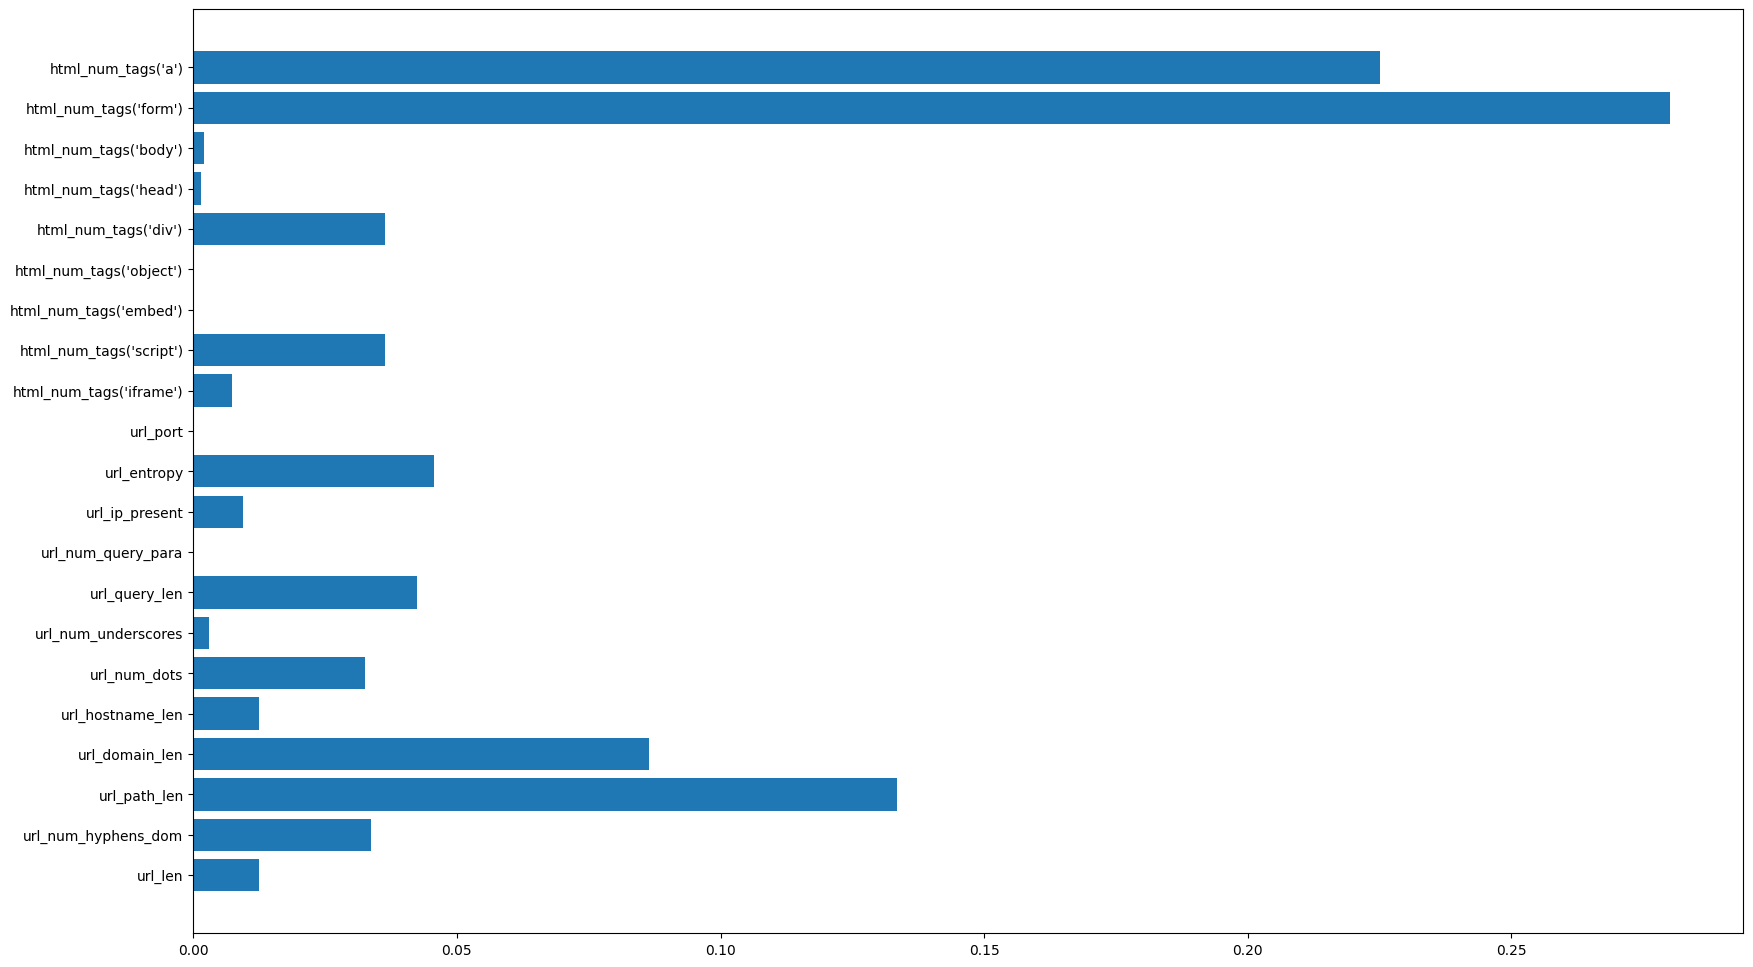

In [31]:
# 여기에 답안코드를 작성하세요.

# feature_importances_ 활용 Feature(특징)별 가중치 확인
plt.figure(figsize=(20,12))
plt.barh(y=df.columns[:-1],
        width = dtc.feature_importances_)
plt.show()

---
### Random Forest 모델을 만들어보자

* RandomForest란? <br>
    * 여러 개의 DecisionTree(결정트리)를 활용한 배깅 방식의 대표적인 알고리즘<br>
    * 배깅과 페이스팅은 훈련 세트에서 무작위로 샘플링하여 여러 개의 예측기를 훈련<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html


* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">n_estimators</td><td>생성할 의사결정 나무 개수,  default=10</td>
    </tr>
    <tr>
        <td align="center">min_samples_split</td><td>노드를 분할하기 위한 최소한의 샘플 데이터 수, default=2</td>
    </tr>
    <tr>
        <td align="center">min_samples_leaf</td><td>리프노드가 되기 위해 필요한 최소한의 샘플 데이터 수</td>
    </tr>
    <tr>
        <td align="center">max_features</td><td>의사결정 나무 만들시에 사용하는 최대 feature 개수, default=auto</td>
    </tr>
    <tr>
        <td align="center">max_depth</td><td>트리의 최대 깊이, default=None</td>
    </tr>
    <tr>
        <td align="center">max_leaf_nodes</td><td>리프노드의 최대 개수</td>
    </tr>
</table>

In [32]:
# 여기에 답안코드를 작성하세요.

# 1. import (Hint: from sklearn.ensemble import RandomForestClassifier)

from sklearn.ensemble import RandomForestClassifier


In [33]:
# 여기에 답안코드를 작성하세요.

# 2.선언 (Hint: rfc = RandomForestClassifier())

rfc = RandomForestClassifier()


In [34]:
# 여기에 답안코드를 작성하세요.

# 3. fit(), 학습 (Hint: rfc.fit(train_x,train_y))

rfc.fit(train_x,train_y)


RandomForestClassifier()

In [35]:
# 여기에 답안코드를 작성하세요.

# 4. predict(), 예측 (Hint: rfc_pred = rfc.predict(test_x))

rfc_pred = rfc.predict(test_x)


In [36]:
# 여기에 답안코드를 작성하세요.

# train 및 test 데이터 정확도 확인 (Hint: rfc.score(test_x, test_y))

rfc.score(train_x,train_y), rfc.score(test_x, test_y)


(1.0, 0.9484536082474226)

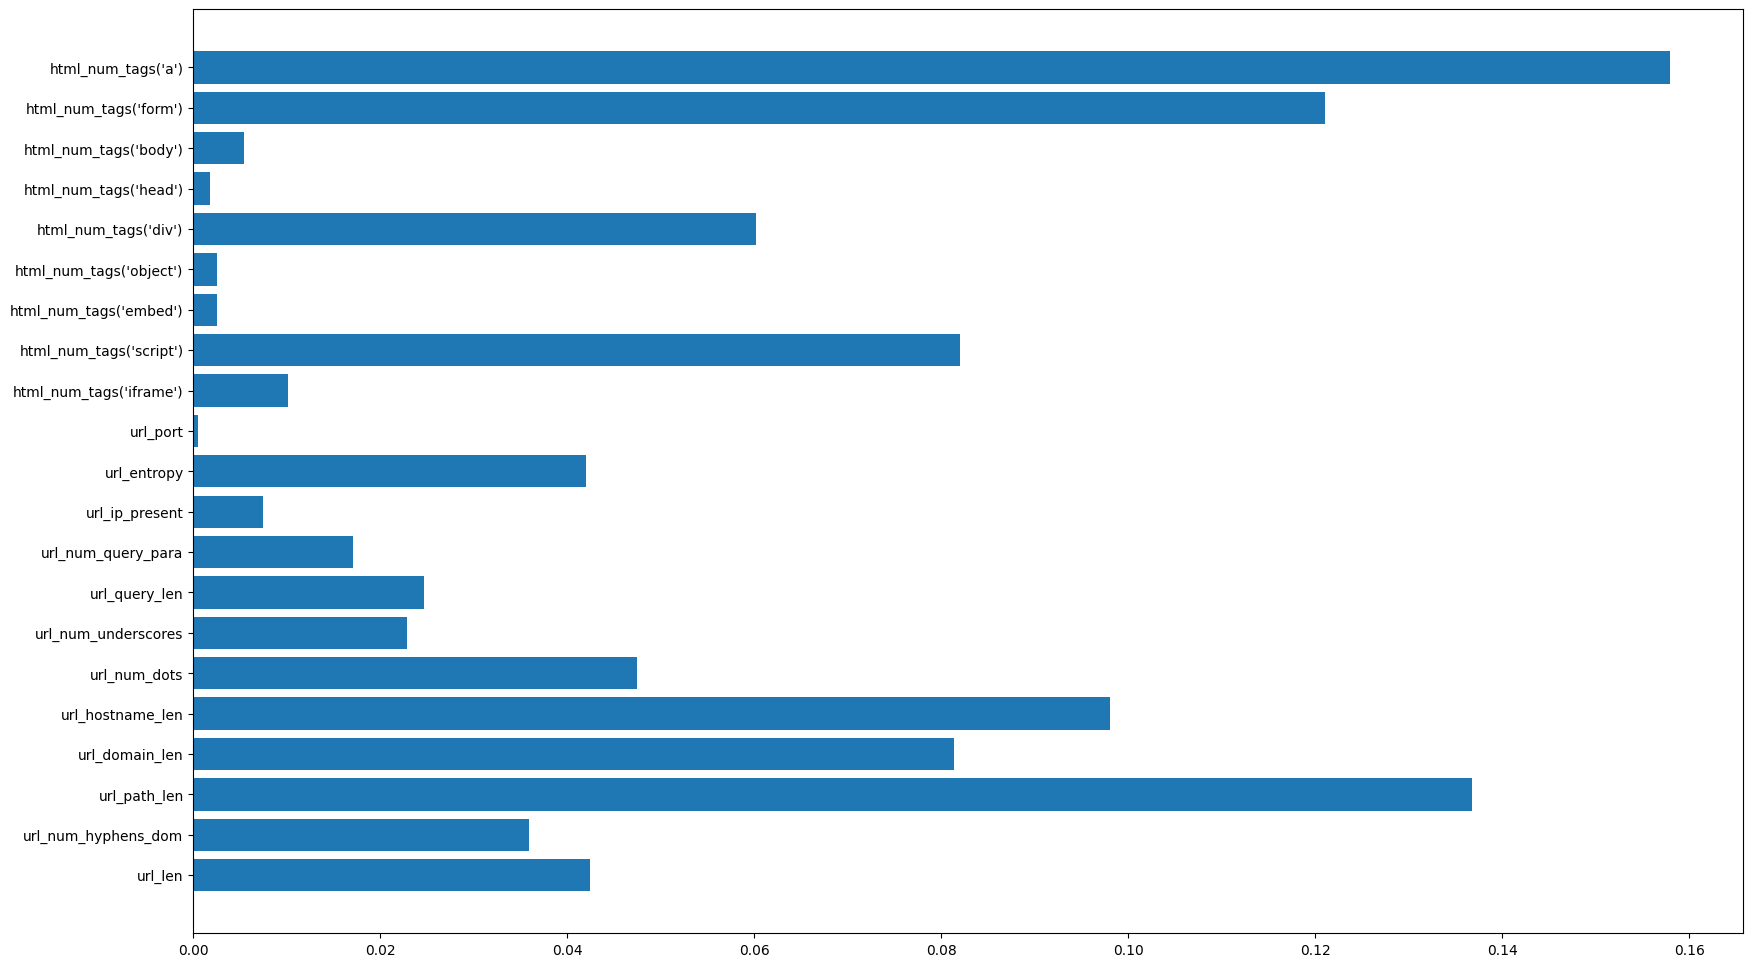

In [37]:
# 여기에 답안코드를 작성하세요.

# feature_importances_ 활용 Feature(특징)별 가중치 확인

plt.figure(figsize=(20,12))
plt.barh(y=df.columns[:-1],
        width = rfc.feature_importances_)
plt.show()

---
### <b> AdaBoost 모델을 만들어보자

* AdaBoost란? <br>
    * 약한 학습기(weak learner)의 오류 데이터에 가중치를 부여하면서 부스팅을 수행하며 학습<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html<br>

* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">base_estimators</td><td>학습에 사용하는 알고리즘, default = None(DecisionTreeClassifier 적용)</td>
    </tr>
    <tr>
        <td align="center">n_estimators</td><td>생성할 약한 학습기의 개수를 지정, default = 50</td>
    </tr>
    <tr>
        <td align="center">learning_rate</td><td>학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default = 1</td>
    </tr>
</table>

In [38]:
# 여기에 답안코드를 작성하세요.

# 1. import (Hint: from sklearn.ensemble import AdaBoostClassifier)

from sklearn.ensemble import AdaBoostClassifier


In [39]:
# 여기에 답안코드를 작성하세요.

# 2.선언 (Hint: abc = AdaBoostClassifier())

abc = AdaBoostClassifier()


In [40]:
# 여기에 답안코드를 작성하세요.

# 3. fit(), 학습 (Hint: abc.fit(train_x,train_y))

abc.fit(train_x,train_y)


AdaBoostClassifier()

In [41]:
# 여기에 답안코드를 작성하세요.
# 4. predict(), 예측 (Hint: abc_pred = abc.predict(test_x))

abc_pred = abc.predict(test_x)


In [42]:
# 여기에 답안코드를 작성하세요.

# train 및 test 데이터 정확도 확인 (Hint: abc.score(test_x, test_y))

abc.score(train_x, train_y), abc.score(test_x, test_y)


(0.9469261388766033, 0.9216494845360824)

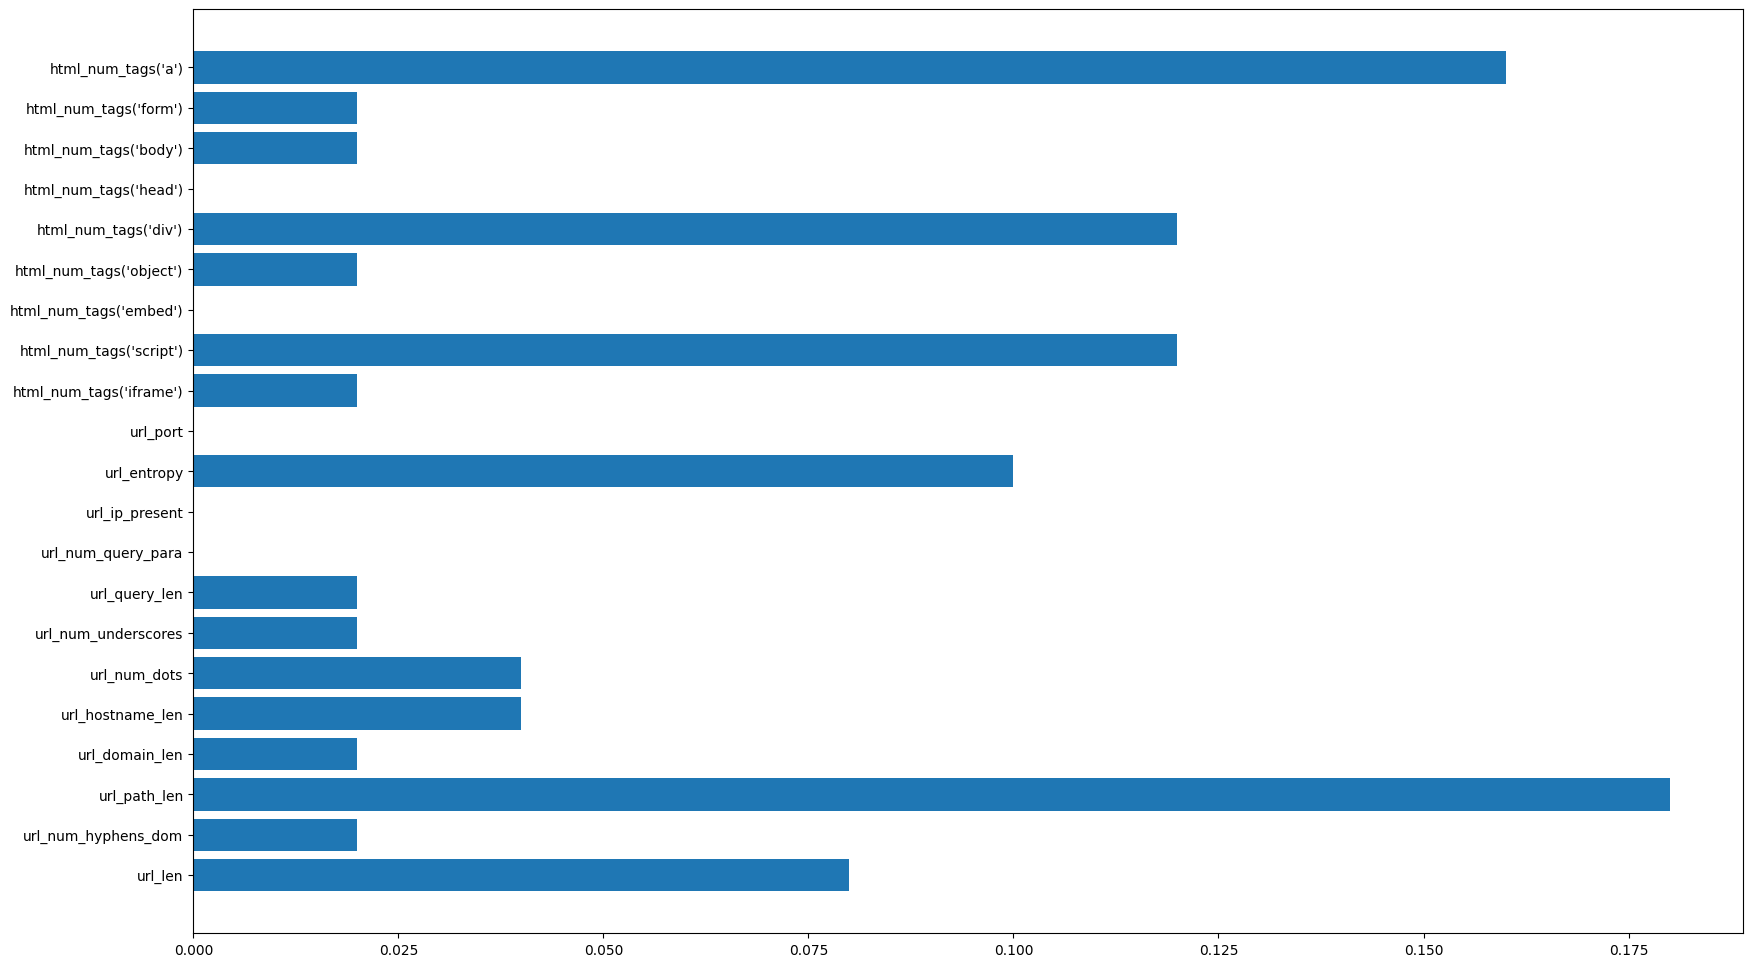

In [43]:
# 여기에 답안코드를 작성하세요.

# feature_importances_ 활용 Feature(특징)별 가중치 확인

plt.figure(figsize=(20,12))
plt.barh(y=df.columns[:-1],
        width = abc.feature_importances_)
plt.show()

---
### <b> Gradient Boost 모델을 만들어보자

* GradientBoost란? <br>
    * 이전 예측기가 만든 잔여오차에 새로운 예측기를 학습<br>
    * Gradient Boost를 발전시킨 모델이 XGBoost, Light GBM, CatBoost<br>
    * 참고 사이트 : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html

* 주요 하이퍼 파라미터<br>
<table align="left">
    <tr>
        <td align="center">파라미터 명</td><td align="center">설명</td>
    </tr>
     <tr>
        <td align="center">n_estimators</td><td>생성할 트리의 개수, default = 100</td>
    </tr>
    <tr>
        <td align="center">learning_rate</td><td>학습을 진행할 때마다 적용하는 학습률(0~1 사이의 값), default = 1</td>
    </tr>
    <tr>
        <td align="center">loss</td><td>경사하강법에서 사용할 손실 함수 지정</td>
    </tr>
</table>

In [44]:
# 여기에 답안코드를 작성하세요.

# 1. import (Hint: from sklearn.ensemble import GradientBoostingClassifier)

from sklearn.ensemble import GradientBoostingClassifier


In [45]:
# 여기에 답안코드를 작성하세요.

# 2.선언 (Hint: gbc = GradientBoostingClassifier())

gbc = GradientBoostingClassifier()


In [46]:
# 여기에 답안코드를 작성하세요.

# 3. fit(), 학습 (Hint: gbc.fit(train_x,train_y))


gbc.fit(train_x,train_y)


GradientBoostingClassifier()

In [47]:
# 여기에 답안코드를 작성하세요.

# 4. predict(), 예측 (Hint: gbc_pred = gbc.predict(test_x))

gbc_pred = gbc.predict(test_x)


In [48]:
# 여기에 답안코드를 작성하세요.

# train 및 test 데이터 정확도 확인 (Hint: gbc.score(test_x,test_y))

gbc.score(train_x, train_y), gbc.score(test_x,test_y)


(0.9672711189739054, 0.9371134020618557)

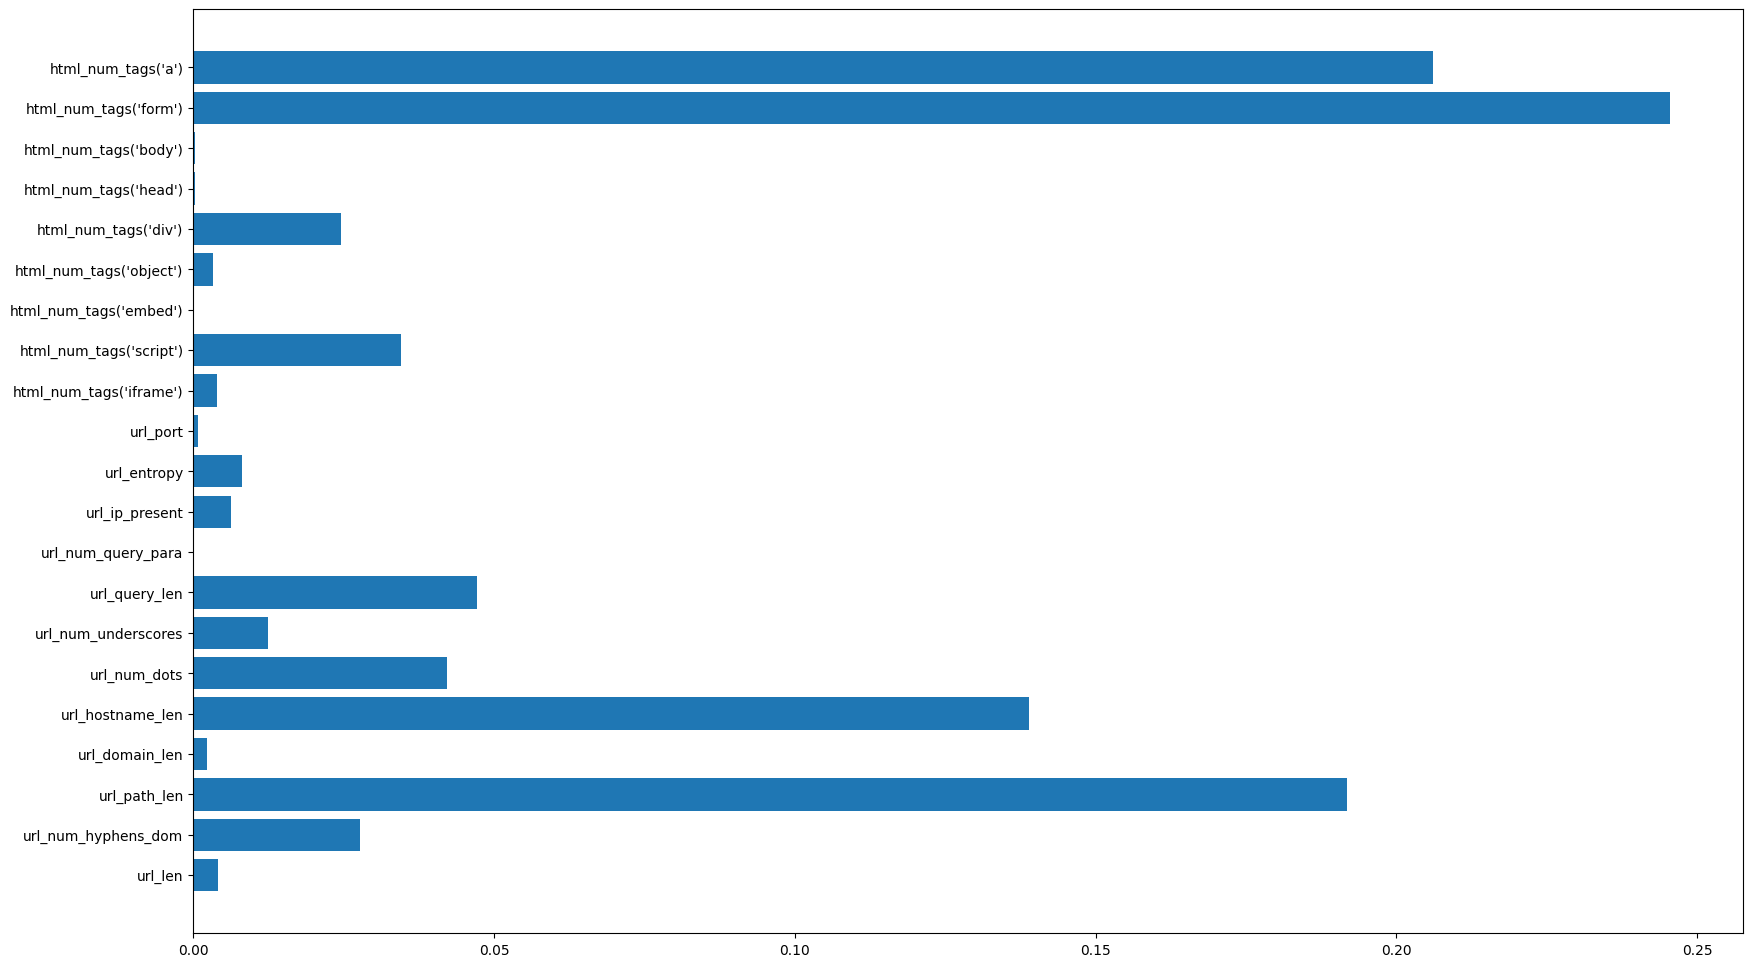

In [49]:
# 여기에 답안코드를 작성하세요.

# feature_importances_ 활용 Feature(특징)별 가중치 확인

plt.figure(figsize=(20,12))
plt.barh(y=df.columns[:-1],
        width = gbc.feature_importances_)
plt.show()

### 딥러닝


In [50]:
# 다음 문항을 풀기 전에 아래 코드를 실행하세요.

import tensorflow as tf
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.utils import to_categorical

tf.random.set_seed(1)

### 딥러닝 : 아래 가이드에 따라 모델링하고 학습을 진행하세요.
* Tensoflow framework를 사용하여 딥러닝 모델을 만드세요.
* 히든레이어(hidden layer) 2개이상으로 모델을 구성하세요.
* dropout 비율 0.2로 Dropout 레이어 1개를 추가해 주세요.
* 하이퍼파라미터 epochs: 30, batch_size: 16으로 설정해주세요.
* 각 에포크마다 loss와 metrics 평가하기 위한 데이터로 test_x, test_y 사용하세요.
* 학습정보는 history 변수에 저장해주세요

In [51]:
# 여기에 답안코드를 작성하세요.

model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(train_x.shape[1],)))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', 
              loss='binary_crossentropy', 
              metrics=['accuracy']) 

es = EarlyStopping(monitor='val_loss', patience=5) 

checkpoint_path = 'best_model.keras'
mc = ModelCheckpoint(checkpoint_path, monitor='val_loss',verbose=1, save_best_only=True)

history = model.fit(train_x, train_y, epochs=30, batch_size=16,
                   validation_data = (test_x, test_y),
                    callbacks=[es, mc]
                    )

Epoch 1/30
133/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5349 - loss: 1.7816
Epoch 1: val_loss improved from inf to 0.67036, saving model to best_model.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5405 - loss: 1.7463 - val_accuracy: 0.7381 - val_loss: 0.6704
Epoch 2/30
139/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7091 - loss: 0.6954
Epoch 2: val_loss improved from 0.67036 to 0.47227, saving model to best_model.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7097 - loss: 0.6947 - val_accuracy: 0.7732 - val_loss: 0.4723
Epoch 3/30
134/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7545 - loss: 0.5734
Epoch 3: val_loss improved from 0.47227 to 0.44622, saving model to best_model.keras
142/142 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7547 - loss: 0.5729 - val_accuracy: 0.7928 - val_loss: 0.4462
Epoch 4/30
139/142 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7620 - loss: 0.5086
Epoch 4: val_loss improved from 0.44622 to 0.42877, sa

<br>

### 위 딥러닝 모델의 성능을 평가하려고 합니다.
* Matplotlib 라이브러리 활용해서 학습 accuracy와 검증 accuracy를 그래프로 표시하세요.
* 1개의 그래프에 학습 accuracy와 검증 accuracy 2가지를 모두 표시하세요.
* 위 2가지 각각의 범례를 'acc', 'val_macc'로 표시하세요.
* 그래프의 타이틀은 'Accuracy'로 표시하세요.
* X축에는 'Epochs'라고 표시하고 Y축에는 'Acc'라고 표시하세요.

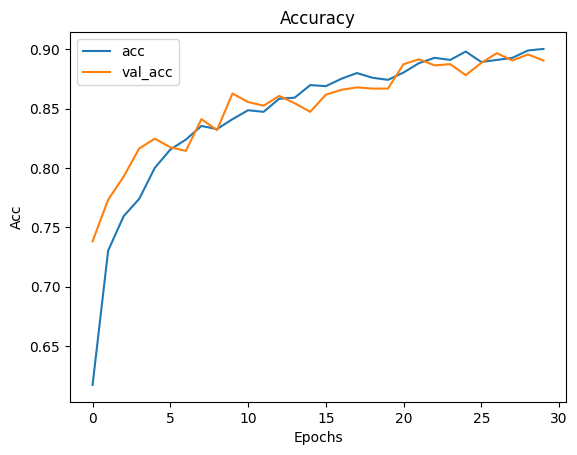

In [52]:
# 여기에 답안코드를 작성하세요.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend(['acc', 'val_acc'])
plt.show()

### [선택] 모든 과정을 수행한 후에는 머신러닝, 딥러닝 모델의 성능을 향상시켜보세요.